#Simple agent


In [1]:
!pip install langgraph --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 12.0 MB/s eta 0:00:00


In [31]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
  message: str

def greeting_node(state: AgentState) -> AgentState:
  """ simple node that adds a greeting message to the state"""
  state['message'] = "Hey " + state['message'] + ", how is your day going?"
  return state

In [4]:
graph = StateGraph(AgentState)
graph.add_node("greeter", greeting_node)
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")
app = graph.compile()

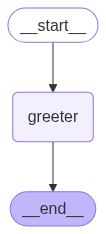

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
result = app.invoke({'message': 'Rishee'})
result['message']

'Hey Rishee, how is your day going?'

#Agent with multiple inputs


In [12]:
class MultipleAgent(TypedDict):
  values: List[int]
  name: str
  result: str

In [13]:
def process_values(state: MultipleAgent) -> MultipleAgent:
  state['result'] = f"Hi there {state['name']}! Your sum is {sum(state['values'])}"
  return state

In [15]:
graph = StateGraph(MultipleAgent)
graph.add_node("Processor", process_values)
graph.set_entry_point("Processor")
graph.set_finish_point("Processor")
app = graph.compile()

In [16]:
answers = app.invoke({"values": [1, 2, 3, 4, 5], "name": "Rishee"})
print(answers['result'])

Hi there Rishee! Your sum is 15


# Sequential Agent


In [17]:
class SequentialAgent(TypedDict):
  name: str
  age: str
  final: str

In [27]:
def first_node(state: SequentialAgent) -> SequentialAgent:
  """ This is the first node"""
  state['final'] = f"Hi {state['name']}, "
  return state

def second_node(state: SequentialAgent) -> SequentialAgent:
  """ This is the second node """
  state['final'] = state['final'] + f"Your age is {state['age']}!"
  return state

In [28]:
graph = StateGraph(SequentialAgent)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.set_entry_point("first_node")
## this is a new thing that we're about to do
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")
app = graph.compile()

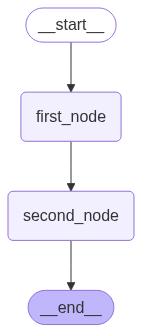

In [29]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [30]:
info = app.invoke({"name": "Rishee", "age": "20"})
print(info['final'])

Hi Rishee, Your age is 20!


# Conditional Graph

In [32]:
class ConditionalAgent(TypedDict):
  number1: int
  operation: str
  number2: int
  finalNumber: str

In [33]:
def adder(state: ConditionalAgent) -> ConditionalAgent:
  """This node adds the tqo nummbers"""
  state['finalNumber'] = state['number1'] + state['number2']
  return state

def subbtractor(state: ConditionalAgent) -> ConditionalAgent:
  """This node subtacts the two numbers"""
  state['finalNumber'] = state['number1'] - state['number2']
  return state

def decide_next_node(state: ConditionalAgent) -> ConditionalAgent:
  """This node decides whch op to perform"""
  if state['operation'] == '+':
    return "addition_op"
  elif state['operation'] == '-':
    return "subtraction_op"

In [34]:
graph = StateGraph(ConditionalAgent)
graph.add_node("add_node", adder)
graph.add_node("sub_node", subbtractor)
graph.add_node("decider", lambda state: state)
graph.add_edge(START, "decider")

graph.add_conditional_edges(
    "decider",
    decide_next_node,
    {
        "addition_op": "add_node",
        "subtraction_op": "sub_node"
    }
)
graph.add_edge("add_node", END)
graph.add_edge("sub_node", END)
app = graph.compile()

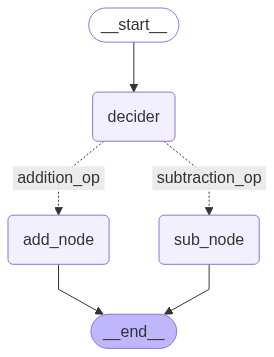

In [35]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [37]:
result = app.invoke({"number1": 10, "operation": "+", "number2": 8})
print(result['finalNumber'])

18
